In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pprint import pprint

%matplotlib inline

In [123]:
#full_data = pd.read_csv("datasets/wine/wine_train.csv")
full_data = pd.read_csv("datasets/wine/wine_test.csv")
target = full_data[["Cultivator"]]
atributes = full_data.drop("Cultivator", axis=1) # drop labels for training set
full_data.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
1,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650
2,1,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915
3,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
4,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630


In [124]:
target.head()

,Cultivator
0,1
1,3
2,1
3,2
4,2


In [125]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(categories='auto')
target_hot = cat_encoder.fit_transform(target).toarray()

In [126]:
#target = np.array(full_data["Cultivator"].copy(),dtype=int)
target = np.array(target["Cultivator"],dtype=int)
pprint(target)

array([1, 3, 1, 2, 2, 1, 1, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3])


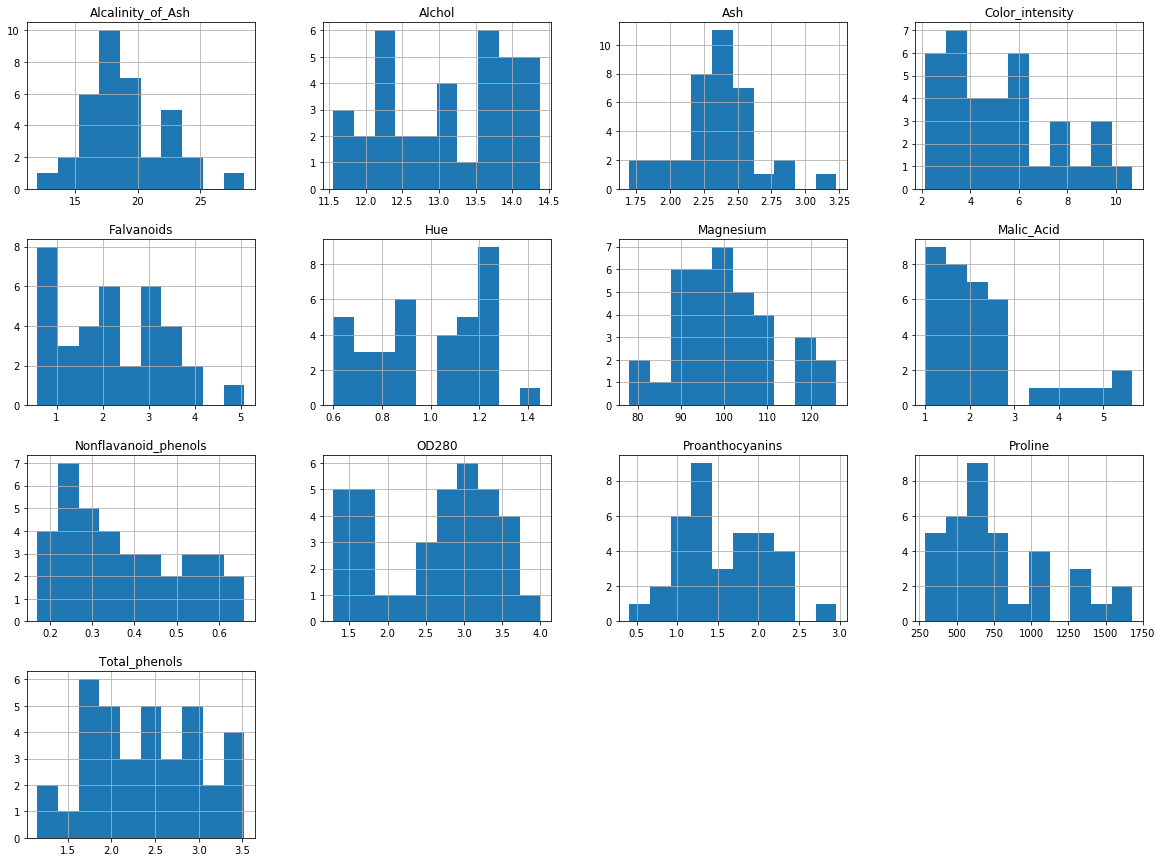

In [127]:
atributes.hist(bins=10, figsize=(20,15))
plt.show()

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

attribs_labels = list(atributes)
pprint(attribs_labels)

# Replace any missing values with the median value
# Nomalize all the data

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('nomalize', MinMaxScaler()),
    ])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, attribs_labels),
#        ("cat", OneHotEncoder(), cat_attribs),
    ])



['Alchol',
 'Malic_Acid',
 'Ash',
 'Alcalinity_of_Ash',
 'Magnesium',
 'Total_phenols',
 'Falvanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280',
 'Proline']


In [129]:
attribs = full_pipeline.fit_transform(atributes)

In [130]:
attribs

array([[0.90070922, 0.24784483, 0.39215686, 0.36363636, 0.5625    ,
        0.75949367, 0.60888889, 0.10204082, 0.77254902, 0.42203986,
        0.76470588, 0.69372694, 0.87769784],
       [0.33687943, 0.04956897, 0.35947712, 0.33333333, 0.14583333,
        0.35864979, 0.        , 0.87755102, 0.32941176, 0.38686987,
        0.17647059, 0.08118081, 0.25899281],
       [0.81914894, 0.19181034, 0.71895425, 0.44848485, 0.60416667,
        0.75949367, 0.53111111, 0.40816327, 0.52941176, 0.27549824,
        0.76470588, 0.77859779, 0.44964029],
       [0.        , 0.22413793, 1.        , 1.        , 0.85416667,
        0.85654008, 1.        , 0.6122449 , 0.57254902, 0.45134818,
        0.38823529, 0.88560886, 0.12589928],
       [0.74822695, 0.05172414, 0.14379085, 0.36363636, 0.33333333,
        0.40084388, 0.26888889, 0.30612245, 0.1254902 , 0.19343494,
        0.74117647, 0.43173432, 0.24460432],
       [0.80496454, 0.13793103, 0.58823529, 0.31515152, 0.33333333,
        0.54852321, 0.53555

In [131]:
dataset = {"attribs_labels":attribs_labels,"attribs":attribs.tolist(),"target":target.tolist(),"target_hot":target_hot.tolist()}

In [132]:
#with open("datasets/wine/wine_train.json","w") as jout:
with open("datasets/wine/wine_test.json","w") as jout:
    json.dump(dataset,jout)

In [133]:
print(dataset["attribs"][0],dataset["target"][0],dataset["target_hot"][0])

[0.9007092198581557, 0.2478448275862069, 0.392156862745098, 0.36363636363636354, 0.5625, 0.759493670886076, 0.6088888888888888, 0.10204081632653056, 0.7725490196078433, 0.42203985932004695, 0.7647058823529412, 0.6937269372693726, 0.8776978417266188] 1 [1.0, 0.0, 0.0]
